# Customer Churn Analysis

**Author:** Kousik Chakraborty

This project focuses on analyzing customer churn using the Telco Customer Churn dataset.
The objective is to explore customer behavior, perform data analysis and segmentation, and build machine learning models to predict customer churn.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,roc_auc_score
import pickle
import warnings
warnings.filterwarnings("ignore")

## Task 1: Data Preparation

In this step, the Telco Customer Churn dataset was loaded and inspected to understand its structure, data types, and overall quality. 
Basic exploratory checks were performed to identify missing values and inconsistencies.

Missing values were handled appropriately to ensure data reliability. 
Categorical features were reviewed, and encoding was intentionally deferred to the model-building stage to avoid unnecessary transformations during exploratory analysis.

The dataset was prepared for further analysis and modeling by ensuring clean, consistent, and usable data.

In [2]:
df=pd.read_csv("Telco_Customer_Churn_Dataset.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.shape

(7043, 21)

In [4]:
df.drop("customerID",axis=1,inplace=True)

In [5]:
df.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [6]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [8]:
numerical_features=["tenure","MonthlyCharges","TotalCharges"]
for cols in df.columns:
    if cols not in numerical_features:
        print(cols,df[cols].unique())

gender ['Female' 'Male']
SeniorCitizen [0 1]
Partner ['Yes' 'No']
Dependents ['No' 'Yes']
PhoneService ['No' 'Yes']
MultipleLines ['No phone service' 'No' 'Yes']
InternetService ['DSL' 'Fiber optic' 'No']
OnlineSecurity ['No' 'Yes' 'No internet service']
OnlineBackup ['Yes' 'No' 'No internet service']
DeviceProtection ['No' 'Yes' 'No internet service']
TechSupport ['No' 'Yes' 'No internet service']
StreamingTV ['No' 'Yes' 'No internet service']
StreamingMovies ['No' 'Yes' 'No internet service']
Contract ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ['Yes' 'No']
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn ['No' 'Yes']


In [9]:
df[df["TotalCharges"]==" "]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [10]:
df["TotalCharges"].replace({" ":"0.0"},inplace=True)

In [11]:
df["TotalCharges"]=df["TotalCharges"].astype(float)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [14]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


### Key Insights from Exploratory Data Preparation
1. Customer ID removed as it is not required for modelling
2. Blank values in the TotalCharges column were identified and handled appropriately.
3. The TotalCharges column was converted to a numerical format for analysis and modeling.
4. Class imbalance identified in the target variable(Churn).

## Task 2: Exploratory Data Analysis (EDA)

In this task, exploratory data analysis was performed to understand customer churn behavior.
The overall churn rate was calculated and visualized to assess the proportion of customers leaving the service.

Customer churn was analyzed across demographic variables such as gender, partner status, and dependent status.
Additionally, tenure distribution and its relationship with churn were examined, along with churn patterns across different contract types and payment methods to identify key factors influencing customer attrition.

In [15]:
churn_rate=df["Churn"].value_counts(normalize=True)*100
print(churn_rate)

Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


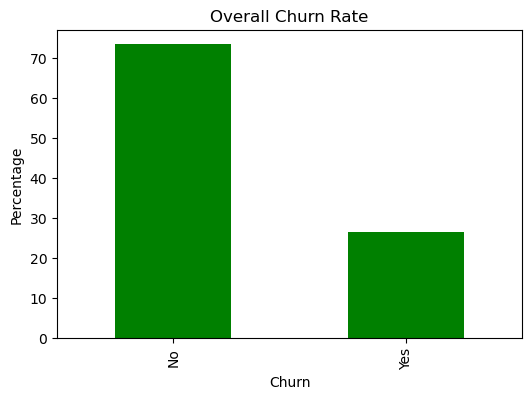

In [16]:
plt.figure(figsize=(6,4))
churn_rate.plot(kind='bar',color="g")
plt.title("Overall Churn Rate")
plt.xlabel("Churn")
plt.ylabel("Percentage")
plt.show()

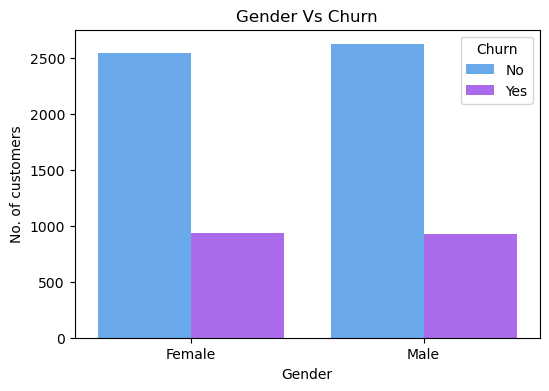

In [17]:
plt.figure(figsize=(6,4))
sns.countplot(x="gender",hue="Churn",data=df,palette="cool")
plt.title("Gender Vs Churn")
plt.xlabel("Gender")
plt.ylabel("No. of customers")
plt.show()

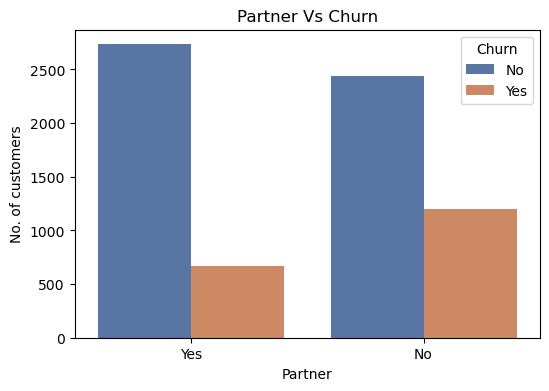

In [18]:
plt.figure(figsize=(6,4))
sns.countplot(x="Partner",hue="Churn",palette="deep",data=df)
plt.title("Partner Vs Churn")
plt.xlabel("Partner")
plt.ylabel("No. of customers")
plt.show()

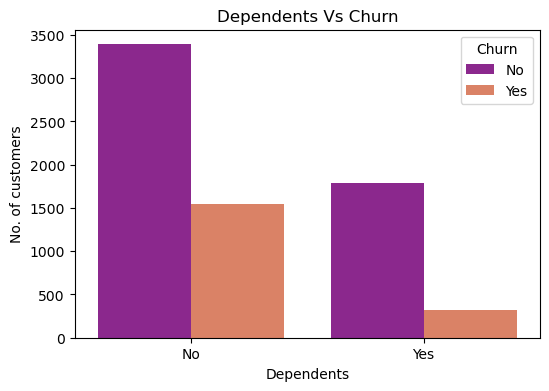

In [19]:
plt.figure(figsize=(6,4))
sns.countplot(x="Dependents",hue="Churn",palette="plasma",data=df)
plt.title("Dependents Vs Churn")
plt.xlabel("Dependents")
plt.ylabel("No. of customers")
plt.show()

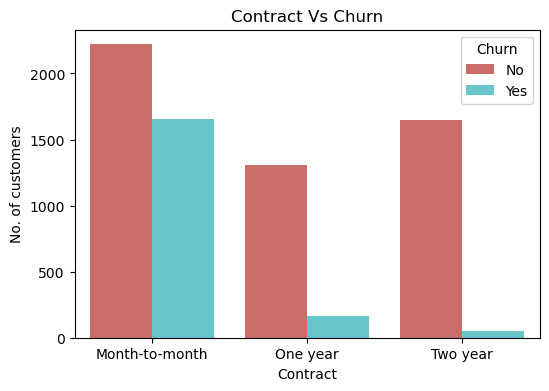

In [20]:
plt.figure(figsize=(6,4))
sns.countplot(x="Contract",hue="Churn",palette="hls",data=df)
plt.title("Contract Vs Churn")
plt.xlabel("Contract")
plt.ylabel("No. of customers")
plt.show()

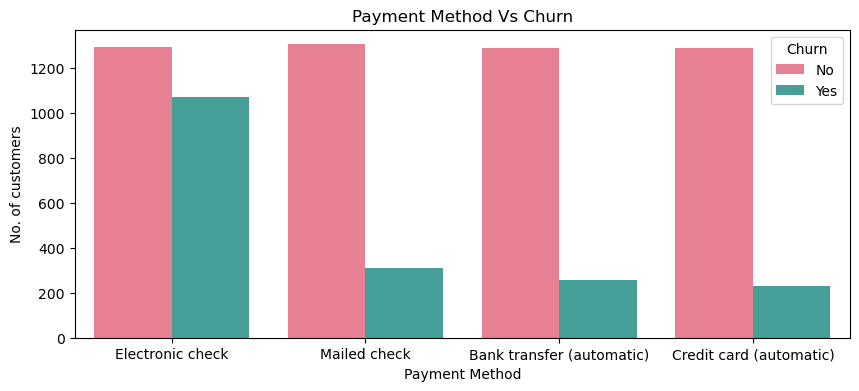

In [21]:
plt.figure(figsize=(10,4))
sns.countplot(x="PaymentMethod",hue="Churn",palette="husl",data=df)
plt.title("Payment Method Vs Churn")
plt.xlabel("Payment Method")
plt.ylabel("No. of customers")
plt.show()

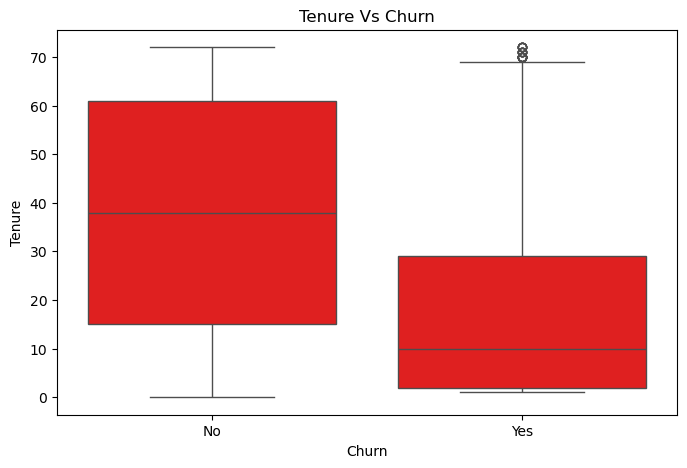

In [22]:
plt.figure(figsize=(8,5))
sns.boxplot(x="Churn",y="tenure",data=df,color="red")
plt.title("Tenure Vs Churn")
plt.xlabel("Churn")
plt.ylabel("Tenure")
plt.show()

### Key Insights from Exploratory Data Analysis

- The overall churn rate indicates a notable proportion of customers discontinue services.
- Customers with shorter tenure are significantly more likely to churn compared to long-term customers.
- Month-to-month contract customers exhibit the highest churn rates.
- Customers using certain payment methods show higher churn tendencies.
- Long-term contracts and longer tenure are associated with better customer retention.

## Task 3: Customer Segmentation

In this task, customers were segmented based on tenure, monthly charges, and contract type.
Churn rates within each segment were analyzed to identify customer groups with higher churn risk.

The analysis revealed that customers with short tenure, high monthly charges, and month-to-month
contracts exhibit the highest churn rates. Additionally, a subset of long-term, high-paying
customers on flexible contracts were identified as high-value customers at risk of churning,
highlighting the need for targeted retention strategies.

In [23]:
def tenure_segment(tenure):
    if tenure<=12:
        return 'New'
    elif tenure>12 and tenure<=36:
        return 'Mid-term'
    else:
        return 'Long-term'

In [24]:
df["Tenure_Group"]=df["tenure"].apply(tenure_segment)

In [25]:
df[['tenure','Tenure_Group']].sample(5)

,tenure,Tenure_Group
6168,1,New
6248,60,Long-term
4059,2,New
2014,13,Mid-term
2133,1,New


In [26]:
def charge_segment(charge):
    if charge<=35:
        return 'Low'
    elif charge>35 and charge<=70:
        return 'Medium'
    else:
        return 'High'
    

In [27]:
df["Charge_Group"]=df["MonthlyCharges"].apply(charge_segment)

In [28]:
df[["MonthlyCharges","Charge_Group"]].sample(5)

,MonthlyCharges,Charge_Group
1988,108.85,High
4916,79.55,High
5682,35.00,Low
517,70.05,High
4224,19.60,Low


In [29]:
tenure_churn=df.groupby("Tenure_Group")["Churn"].value_counts(normalize=True)*100
print(tenure_churn)

Tenure_Group  Churn
Long-term     No       88.070643
              Yes      11.929357
Mid-term      No       74.461207
              Yes      25.538793
New           No       52.561757
              Yes      47.438243
Name: proportion, dtype: float64


In [30]:
charge_churn=df.groupby("Charge_Group")["Churn"].value_counts(normalize=True)*100
print(charge_churn)

Charge_Group  Churn
High          No       64.638571
              Yes      35.361429
Low           No       89.106628
              Yes      10.893372
Medium        No       76.057971
              Yes      23.942029
Name: proportion, dtype: float64


In [31]:
contract_churn=df.groupby("Contract")["Churn"].value_counts(normalize=True)*100
print(contract_churn)

Contract        Churn
Month-to-month  No       57.290323
                Yes      42.709677
One year        No       88.730482
                Yes      11.269518
Two year        No       97.168142
                Yes       2.831858
Name: proportion, dtype: float64


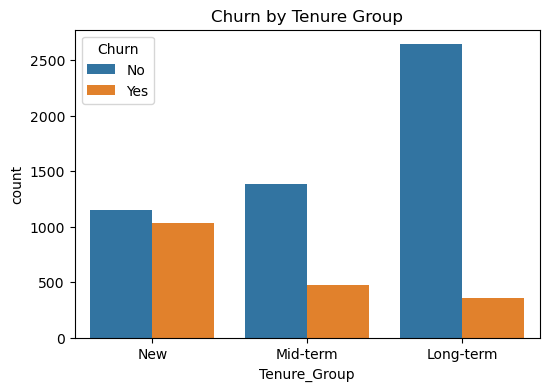

In [32]:
plt.figure(figsize=(6,4))
sns.countplot(x="Tenure_Group",hue="Churn",data=df)
plt.title("Churn by Tenure Group")
plt.show()

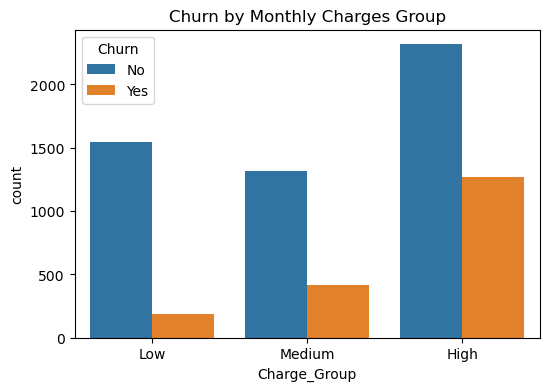

In [33]:
plt.figure(figsize=(6,4))
sns.countplot(x="Charge_Group",hue="Churn",data=df)
plt.title("Churn by Monthly Charges Group")
plt.show()

In [34]:
high_risk_customers=df[
    (df["Tenure_Group"]=='Long-term')&(df["Charge_Group"]=='High')&(df["Contract"]=='Month-to-month') & (df["Churn"]=='Yes')
    ]
high_risk_customers.shape

(166, 22)

### Key Insights from Customer Segmentation

1. Customers with shorter tenure exhibit the highest churn rates, indicating that early-stage customers are more likely to discontinue services.
2. High monthly charge customers show a higher tendency to churn, making them critical high-value segments for retention efforts.
3. Month-to-month contract customers experience significantly higher churn compared to customers on one-year or two-year contracts.
4. Long-term customers with high monthly charges on month-to-month contracts were identified as high-value customers at risk of churning.
5. Customers on long-term contracts demonstrate stronger loyalty and lower churn, highlighting the effectiveness of contract-based retention strategies.

## Task 4: Churn Prediction Model

In this task, multiple machine learning models were developed to predict customer churn.
The dataset was encoded and split into training and testing sets.
Several classification algorithms, including Logistic Regression, Decision Tree, and Random Forest, were trained and evaluated using standard performance metrics such as accuracy, precision, recall, and F1-score.
The best-performing model was selected based on its predictive performance and ability to identify churned customers effectively.

In [35]:
df.drop(["Tenure_Group","Charge_Group"],axis=1,inplace=True)

#### Label Encoding for target column

In [36]:
df["Churn"].replace({"Yes":1,"No":0},inplace=True)

In [37]:
df.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [38]:
df["Churn"].value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

In [39]:
object_columns=df.select_dtypes(include="object").columns
print(object_columns)

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')


In [40]:
encoders = {}
for column in object_columns:
  label_enc= LabelEncoder()
  df[column] = label_enc.fit_transform(df[column])
  encoders[column] = label_enc


# save the encoders to a pickle file
with open("encoders.pkl", "wb") as f:
  pickle.dump(encoders, f)


In [41]:
encoders

{'gender': LabelEncoder(),
 'Partner': LabelEncoder(),
 'Dependents': LabelEncoder(),
 'PhoneService': LabelEncoder(),
 'MultipleLines': LabelEncoder(),
 'InternetService': LabelEncoder(),
 'OnlineSecurity': LabelEncoder(),
 'OnlineBackup': LabelEncoder(),
 'DeviceProtection': LabelEncoder(),
 'TechSupport': LabelEncoder(),
 'StreamingTV': LabelEncoder(),
 'StreamingMovies': LabelEncoder(),
 'Contract': LabelEncoder(),
 'PaperlessBilling': LabelEncoder(),
 'PaymentMethod': LabelEncoder()}

In [42]:
df.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1


In [43]:
x=df.drop("Churn",axis=1)
y=df["Churn"]

In [44]:
x.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65


In [45]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [46]:
y_train.shape

(5634,)

#### Synthetic Minority Oversampling Technique(SMOTE)

SMOTE was applied only on the training dataset to address class imbalance, while the test set was kept untouched to ensure unbiased evaluation.

In [47]:
smote = SMOTE(random_state=42)

In [48]:
x_train_smote,y_train_smote=smote.fit_resample(x_train,y_train)

In [49]:
y_train_smote.shape

(8276,)

In [50]:
y_train_smote.value_counts()

Churn
0    4138
1    4138
Name: count, dtype: int64

In [51]:
scaler=StandardScaler()
x_train_smote=scaler.fit_transform(x_train_smote)

In [52]:
x_test_scaled=scaler.transform(x_test)

In [53]:
logistic=LogisticRegression()
logistic.fit(x_train_smote,y_train_smote)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [54]:
y_pred_logistic=logistic.predict(x_test_scaled)

In [55]:
print(accuracy_score(y_test,y_pred_logistic))

0.7643718949609652


In [56]:
print(classification_report(y_test,y_pred_logistic))

              precision    recall  f1-score   support

           0       0.91      0.76      0.83      1036
           1       0.54      0.78      0.64       373

    accuracy                           0.76      1409
   macro avg       0.72      0.77      0.73      1409
weighted avg       0.81      0.76      0.78      1409



In [57]:
rf=RandomForestClassifier(random_state=42,n_estimators=100)
rf.fit(x_train_smote,y_train_smote)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [58]:
y_pred_rf=rf.predict(x_test_scaled)

In [59]:
print(accuracy_score(y_test,y_pred_rf))

0.7771469127040455


In [60]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1036
           1       0.58      0.58      0.58       373

    accuracy                           0.78      1409
   macro avg       0.71      0.71      0.71      1409
weighted avg       0.78      0.78      0.78      1409



In [61]:
dt=DecisionTreeClassifier(max_depth=5,criterion="entropy")
dt.fit(x_train_smote,y_train_smote)

,criterion,'entropy'
,splitter,'best'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [62]:
y_pred_dt=dt.predict(x_test_scaled)

In [63]:
print(accuracy_score(y_test,y_pred_dt))

0.7544357700496807


In [64]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.88      0.77      0.82      1036
           1       0.53      0.72      0.61       373

    accuracy                           0.75      1409
   macro avg       0.71      0.74      0.71      1409
weighted avg       0.79      0.75      0.76      1409



In [65]:
sv=SVC(kernel='rbf',probability=True)
sv.fit(x_train_smote,y_train_smote)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,True
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [66]:
y_pred_svc=sv.predict(x_test_scaled)

In [67]:
print(accuracy_score(y_test,y_pred_svc))

0.7821149751596878


### Key Insights from Churn Prediction Model

Multiple machine learning models, including Logistic Regression, Decision Tree, Random Forest, and Support Vector Machine, were trained to predict customer churn.
To address class imbalance in the target variable, SMOTE was applied only on the training dataset, while the test dataset was kept untouched to ensure unbiased model evaluation.

All available features were retained during model training to preserve maximum information and avoid premature feature elimination.
As a result, the obtained accuracy reflects a realistic and generalizable model performance rather than an overfitted result.

Among the evaluated models, Random Forest and Support Vector Machine achieved the highest accuracy, while Logistic Regression demonstrated stronger recall for churned customers.
This indicates that tree-based and kernel-based models effectively capture complex churn patterns, whereas Logistic Regression offers better interpretability.

Overall, the trained models provide reliable churn predictions and can support data-driven customer retention strategies by identifying customers with a higher likelihood of churn.

## Task 5: Model Evaluation and Interpretation

In this task, the performance of the trained churn prediction models is evaluated using standard classification metrics.
The objective is to assess the models’ ability to correctly identify churned and non-churned customers and interpret the evaluation results.

In [68]:
#Logistic Regression
confusion_matrix_lr=confusion_matrix(y_test,y_pred_logistic)
print("Confusion matrix of Logistic Regression: \n",confusion_matrix_lr)

Confusion matrix of Logistic Regression: 
 [[785 251]
 [ 81 292]]


In [69]:
#Random Forest
confusion_matrix_rf=confusion_matrix(y_test,y_pred_rf)
print("Confusion matrix of Random Forest: \n",confusion_matrix_rf)

Confusion matrix of Random Forest: 
 [[878 158]
 [156 217]]


In [70]:
roc_logistic=roc_auc_score(y_test,logistic.predict_proba(x_test_scaled)[:,1])
print("ROC-AUC for Logistic Regression: ",roc_logistic)

ROC-AUC for Logistic Regression:  0.839479799600443


In [71]:
roc_rf=roc_auc_score(y_test,rf.predict_proba(x_test_scaled)[:,1])
print("ROC-AUC for Random Forest: ",roc_rf)

ROC-AUC for Random Forest:  0.8226306064777914


### Key Insights from Model Evaluation

The evaluation metrics indicate that the trained models are able to distinguish between churned and non-churned customers with reasonable accuracy.
ROC–AUC scores confirm the models’ ability to identify customers with a higher likelihood of churn, making them suitable for churn prediction.